In [2]:
#Importing the required modules
import numpy as np
import keras
import matplotlib 
import matplotlib.pyplot as plt
from keras import models
from keras import layers

In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

We have vectorize dataset by creating all-zero matrix.

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
#Decoding the integer sequences back into sentences
#mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [6]:
# Data Preparation

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

#Encoding the labels
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
#Reference Base Model creation
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Now we will define the model

In [8]:
#Model compilation

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [9]:
#Setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
#Training the model

history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

history_dict = history.history
print(history_dict.keys())

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5075 - accuracy: 0.7813 - val_loss: 0.3910 - val_accuracy: 0.8539
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2953 - accuracy: 0.9059 - val_loss: 0.3075 - val_accuracy: 0.8822
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2194 - accuracy: 0.9263 - val_loss: 0.2864 - val_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1743 - accuracy: 0.9439 - val_loss: 0.2744 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1419 - accuracy: 0.9545 - val_loss: 0.2866 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1183 - accuracy: 0.9649 - val_loss: 0.2934 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0977 - accuracy: 0.9707 - val_loss: 0.3189 - val_accuracy: 0.8835
Epoch 8/20
30

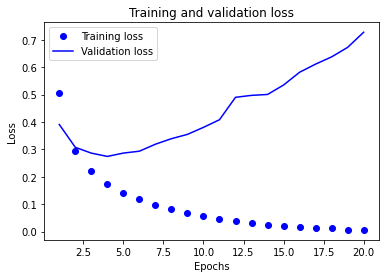

In [11]:
#Plot the training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(val_loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

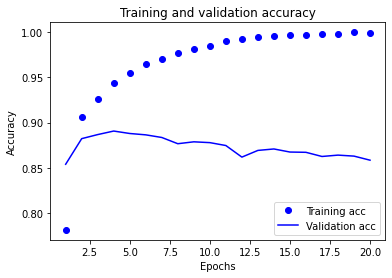

In [12]:
#Plot the training and validation accuracy

plt.clf() 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
#Re-training the model from scratch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 2s 28ms/step - loss: 0.4629 - accuracy: 0.8277
Epoch 2/5
49/49 [==============================] - 1s 28ms/step - loss: 0.2646 - accuracy: 0.9088
Epoch 3/5
49/49 [==============================] - 1s 28ms/step - loss: 0.2016 - accuracy: 0.9292
Epoch 4/5
49/49 [==============================] - 1s 28ms/step - loss: 0.1684 - accuracy: 0.9398
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.3325 - accuracy: 0.8726


In [14]:
print(results)

[0.33247843384742737, 0.8726000189781189]


1. You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.

In [15]:
#Using three hidden layers
model_3L = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_3L.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Training our model

history_3L = model_3L.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history__3L = history_3L.history
history__3L.keys()
model_3L.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512)
result_3L = model_3L.evaluate(x_val, y_val)
result_3L

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5348 - accuracy: 0.7896 - val_loss: 0.4163 - val_accuracy: 0.8534
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3158 - accuracy: 0.9033 - val_loss: 0.3044 - val_accuracy: 0.8873
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2237 - accuracy: 0.9291 - val_loss: 0.2825 - val_accuracy: 0.8896
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1718 - accuracy: 0.9429 - val_loss: 0.2723 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1372 - accuracy: 0.9556 - val_loss: 0.3110 - val_accuracy: 0.8811
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1144 - accuracy: 0.9623 - val_loss: 0.2985 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0940 - accuracy: 0.9701 - val_loss: 0.3319 - val_accuracy: 0.8820
Epoch 8/20
30

[0.9071192145347595, 0.8615999817848206]

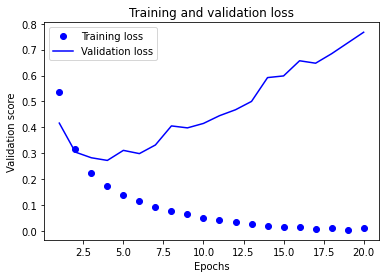

In [16]:
# Plot the training and validation loss
history_dict_3L = history_3L.history

loss = history_3L.history['loss']
val_loss = history_3L.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend()


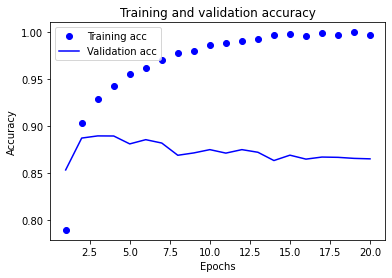

In [17]:
# Plot the training and validation accuracy
plt.clf()
acc = history_dict_3L["accuracy"]
val_acc = history_dict_3L["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

An epoch means training the neural network with all the training data for one cycle .At fourth epoch point the validation loss is minimum and accuracy is decreasing at the fourth epoch point. This is Overfitting. To prevent overfitting, we can stop training after the fourth epoch and then we need to train a new network from scratch for those 4 ephocs inorder to evaluate it in our test data.

In [18]:
model_3LT = models.Sequential()
model_3LT.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_3LT.add(layers.Dense(16, activation='relu'))
model_3LT.add(layers.Dense(16, activation='relu'))
model_3LT.add(layers.Dense(1, activation='sigmoid'))
model_3LT.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model_3LT.fit(x_train, y_train, epochs=4, batch_size=512)
results1 = model_3LT.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4877 - accuracy: 0.7976
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2658 - accuracy: 0.9061
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2000 - accuracy: 0.9283
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2974 - accuracy: 0.8830


In [19]:
print(results1)

[0.2973765730857849, 0.8830400109291077]


We have seen a slight increase in the test accuracy when used three hidden layers.

2. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.

In [20]:
model_2L = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_2L.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [21]:
  history_2L = model_2L.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history__2L = history_2L.history
history__2L.keys()
model_2L.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512)
result_2L = model_2L.evaluate(x_val, y_val)
result_2L

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.4743 - accuracy: 0.7909 - val_loss: 0.3536 - val_accuracy: 0.8590
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2558 - accuracy: 0.9097 - val_loss: 0.3065 - val_accuracy: 0.8736
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1942 - accuracy: 0.9286 - val_loss: 0.2741 - val_accuracy: 0.8884
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1483 - accuracy: 0.9483 - val_loss: 0.2909 - val_accuracy: 0.8868
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1099 - accuracy: 0.9638 - val_loss: 0.3489 - val_accuracy: 0.8717
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0918 - accuracy: 0.9687 - val_loss: 0.3382 - val_accuracy: 0.8799
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0694 - accuracy: 0.9771 - val_loss: 0.3623 - val_accuracy: 0.8785
Epoch 8/20
30

[0.9875267744064331, 0.8647000193595886]

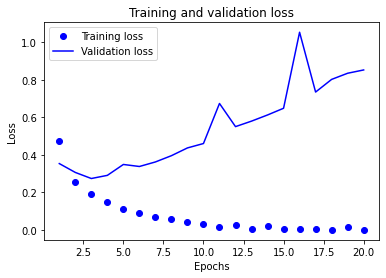

In [22]:
history_dict_2L = history_2L.history
loss_values = history_dict_2L["loss"]
val_loss_values = history_dict_2L["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

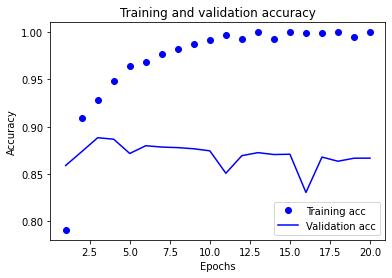

In [23]:
plt.clf()
acc = history_dict_2L["accuracy"]
val_acc = history_dict_2L["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

At fourth epoch point the validation loss is minimum and accuracy is decreasing at the fourth epoch point. This is Overfitting. To prevent overfitting, we can stop training after the fourth epoch and then we need to train a new network from scratch for those 4 ephocs inorder to evaluate it in our test data.

In [24]:
model_2LT = models.Sequential()
model_2LT.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_2LT.add(layers.Dense(64, activation='relu'))
model_2LT.add(layers.Dense(1, activation='sigmoid'))
model_2LT.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model_2LT.fit(x_train, y_train, epochs=4, batch_size=512)
results2 = model_2LT.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 32ms/step - loss: 0.4299 - accuracy: 0.8182
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2398 - accuracy: 0.9094
Epoch 3/4
49/49 [==============================] - 2s 33ms/step - loss: 0.1878 - accuracy: 0.9315
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3355 - accuracy: 0.8740


In [25]:
print(results2)

[0.3355393409729004, 0.873960018157959]


We have seen a slight decrease in the test accuracy when used more hidden units(32,64)

3. Try using the mse loss function instead of binary_crossentropy.

In [26]:
model_mse = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_mse.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [27]:
# Training our model

history_mse = model_mse.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history__mse = history_mse.history
history__mse.keys()
model_mse.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512)
result_mse = model_mse.evaluate(x_val, y_val)
result_mse

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.1865 - accuracy: 0.7628 - val_loss: 0.1306 - val_accuracy: 0.8653
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0993 - accuracy: 0.9011 - val_loss: 0.0987 - val_accuracy: 0.8848
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0681 - accuracy: 0.9309 - val_loss: 0.0885 - val_accuracy: 0.8866
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0514 - accuracy: 0.9481 - val_loss: 0.0835 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0405 - accuracy: 0.9591 - val_loss: 0.0883 - val_accuracy: 0.8798
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0331 - accuracy: 0.9687 - val_loss: 0.0951 - val_accuracy: 0.8698
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0266 - accuracy: 0.9746 - val_loss: 0.0869 - val_accuracy: 0.8823
Epoch 8/20
30

[0.11288627982139587, 0.8636999726295471]

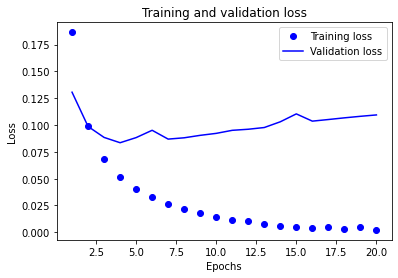

In [28]:
# Plotting the training and validation loss
history_dict_mse = history_mse.history
loss_values = history_dict_mse["loss"]
val_loss_values = history_dict_mse["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

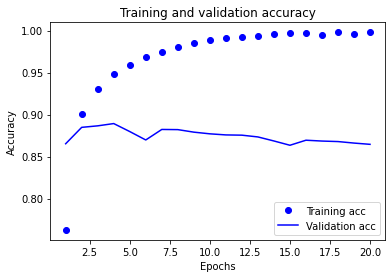

In [29]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict_mse["accuracy"]
val_acc = history_dict_mse["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

At fourth epoch point the validation loss is minimum and accuracy is decreasing at the fourth epoch point. This is Overfitting. To prevent overfitting, we can stop training after the fourth epoch and then we need to train a new network from scratch for those 4 ephocs inorder to evaluate it in our test data.

In [30]:
model_Tmse = models.Sequential()
model_Tmse.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_Tmse.add(layers.Dense(16, activation='relu'))
model_Tmse.add(layers.Dense(1, activation='sigmoid'))
model_Tmse.compile(optimizer='rmsprop',
loss='mse',
metrics=['accuracy'])
model_Tmse.fit(x_train, y_train, epochs=4, batch_size=512)
results3 = model_Tmse.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.1465 - accuracy: 0.8186
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.0766 - accuracy: 0.9121
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.0583 - accuracy: 0.9325
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0874 - accuracy: 0.8816


In [31]:
print(results3)

[0.08737115561962128, 0.8816400170326233]


We have seen a slight increase in the test accuracy when used mse loss function.

4. Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.


In [32]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
    ])
model_tanh.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [33]:
history_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history__tanh = history_tanh.history
history__tanh.keys()
model_tanh.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512)
result_tanh = model_tanh.evaluate(x_val, y_val)
result_tanh

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.1578 - accuracy: 0.7935 - val_loss: 0.1313 - val_accuracy: 0.8227
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0823 - accuracy: 0.9092 - val_loss: 0.0884 - val_accuracy: 0.8860
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0564 - accuracy: 0.9349 - val_loss: 0.0839 - val_accuracy: 0.8856
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0418 - accuracy: 0.9518 - val_loss: 0.0831 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0299 - accuracy: 0.9671 - val_loss: 0.1162 - val_accuracy: 0.8453
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0256 - accuracy: 0.9711 - val_loss: 0.0961 - val_accuracy: 0.8742
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0202 - accuracy: 0.9779 - val_loss: 0.0945 - val_accuracy: 0.8765
Epoch 8/20
30

[0.12367520481348038, 0.8610000014305115]

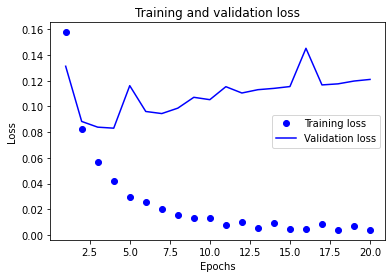

In [34]:
history_dict_tanh = history_tanh.history
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

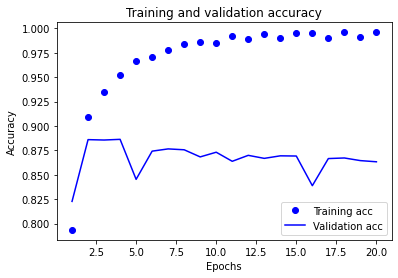

In [35]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

At third epoch point the validation loss is minimum and accuracy is decreasing at the third epoch point. This is Overfitting. To prevent overfitting, we can stop training after the third epoch and then we need to train a new network from scratch for those 3 ephocs inorder to evaluate it in our test data.

In [36]:
model_Ttanh = models.Sequential()
model_Ttanh.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model_Ttanh.add(layers.Dense(16, activation='tanh'))
model_Ttanh.add(layers.Dense(1, activation='sigmoid'))
model_Ttanh.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model_Ttanh.fit(x_train, y_train, epochs=3, batch_size=512)
results_4 = model_Ttanh.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 2s 30ms/step - loss: 0.4126 - accuracy: 0.8316
Epoch 2/3
49/49 [==============================] - 1s 29ms/step - loss: 0.2292 - accuracy: 0.9156
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.3047 - accuracy: 0.8794


In [38]:
print(results_4)

[0.304705947637558, 0.8794400095939636]


We have seen a slight increase in the test accuracy when used tanh activation.

5. Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.

In [39]:
# DropOut
from keras import models
from keras import layers
model_D = models.Sequential()
model_D.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_D.add(layers.Dropout(0.3))
model_D.add(layers.Dense(16, activation='relu'))
model_D.add(layers.Dropout(0.3))
model_D.add(layers.Dense(1, activation='sigmoid'))

In [40]:
model_D.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_D = model_D.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history__D = history_D.history
history__D.keys()
model_D.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512)
result_D = model_D.evaluate(x_val, y_val)
result_D

Epoch 1/4
30/30 [==============================] - 2s 47ms/step - loss: 0.6022 - accuracy: 0.6785 - val_loss: 0.4688 - val_accuracy: 0.8370
Epoch 2/4
30/30 [==============================] - 1s 37ms/step - loss: 0.4407 - accuracy: 0.8222 - val_loss: 0.3568 - val_accuracy: 0.8802
Epoch 3/4
30/30 [==============================] - 1s 38ms/step - loss: 0.3493 - accuracy: 0.8752 - val_loss: 0.3118 - val_accuracy: 0.8873
Epoch 4/4
30/30 [==============================] - 1s 34ms/step - loss: 0.2882 - accuracy: 0.9023 - val_loss: 0.2931 - val_accuracy: 0.8867
Epoch 1/4
30/30 [==============================] - 1s 27ms/step - loss: 0.2368 - accuracy: 0.9222
Epoch 2/4
30/30 [==============================] - 1s 27ms/step - loss: 0.2008 - accuracy: 0.9343
Epoch 3/4
30/30 [==============================] - 1s 27ms/step - loss: 0.1709 - accuracy: 0.9462
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.2998 - accuracy: 0.8885


[0.2998028099536896, 0.8884999752044678]

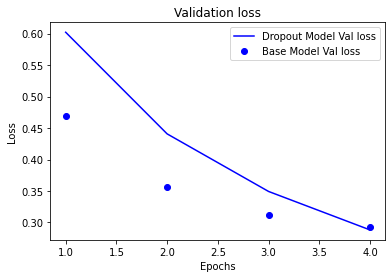

In [55]:
# Plot the training and validation loss
history_dict_D = history_D.history
loss_values = history_dict_D["loss"]
val_loss_values = history_dict_D["val_loss"]
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Dropout Model Val loss")
plt.plot(epochs, history__D["val_loss"], "bo", label="Base Model Val loss")
plt.title("Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

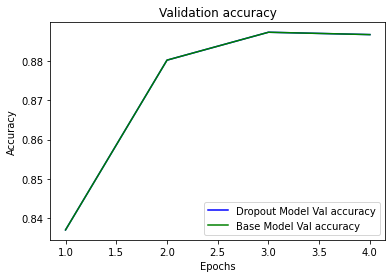

In [56]:
# Plot the training and validation accuracy
plt.clf()

history_dict_D = history_D.history
val_acc = history_dict_D["val_accuracy"]
plt.plot(epochs, val_acc, "b", label="Dropout Model Val accuracy")
plt.plot(epochs, history__D["val_accuracy"], "g", label="Base Model Val accuracy")
plt.title("Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Dropout regularization is a technique to prevent neural networks from overfitting. Dropout works by randomly disabling neurons and their corresponding connections. This prevents the network from relying too much on single neurons and forces all neurons to learn to generalize better resulting in increasing the performance of the network and prevents overfitting.

Final Summary

<Figure size 432x288 with 0 Axes>

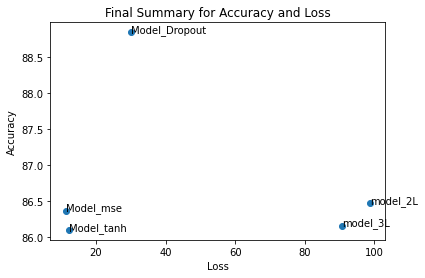

In [52]:
import numpy as np
all_Loss= np.array([result_D[0],result_tanh[0],result_mse[0],result_2L[0],result_3L[0]])*100
all_Loss
all_Accuracy= np.array([result_D[1],result_tanh[1],result_mse[1],result_2L[1],result_3L[1]])*100
all_Accuracy
Labels=['Model_Dropout','Model_tanh','Model_mse','model_2L','model_3L']
plt.clf()

fig, ax = plt.subplots()
ax.scatter(all_Loss,all_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (all_Loss[i],all_Accuracy[i] ))
plt.title("Final Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

From above graph, model dropout has the maximum accuracy and loss.By Increasing the number of hidden layers We have seen a slight decrease in the test accuracy or deflection in the loss function.
Loss value is low when compared to binary cross entropy,while using “MSE” as loss function for IMDB dataset.We have seen a slight increase in the test accuracy when used mse loss function.
The accuracy of tanh activation function is low.Less overfitting is less in regularization model . It shows better accuracy and gives a lower loss. 